In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv ('Downloads/Iris1.csv')

In [3]:
data.head()

,Id,SepalLengthCm,PetalLengthCm,Species
0,1,5.1,1.4,Iris-setosa
1,2,4.9,1.4,Iris-setosa
2,3,4.7,1.3,Iris-setosa
3,4,4.6,1.5,Iris-setosa
4,5,5.0,1.4,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,PetalLengthCm,Species
145,146,6.7,5.2,Iris-virginica
146,147,6.3,5.0,Iris-virginica
147,148,6.5,5.2,Iris-virginica
148,149,6.2,5.4,Iris-virginica
149,150,5.9,5.1,Iris-virginica


In [5]:
data.describe()

,Id,SepalLengthCm,PetalLengthCm
count,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.758667
std,43.445368,0.828066,1.764420
min,1.000000,4.300000,1.000000
25%,38.250000,5.100000,1.600000
50%,75.500000,5.800000,4.350000
75%,112.750000,6.400000,5.100000
max,150.000000,7.900000,6.900000


In [6]:
data.shape

(150, 4)

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
PetalLengthCm    0
Species          0
dtype: int64

In [8]:
count =  data.Species.value_counts()
print(count)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [9]:
lab = data.Species.unique().tolist()
lab

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

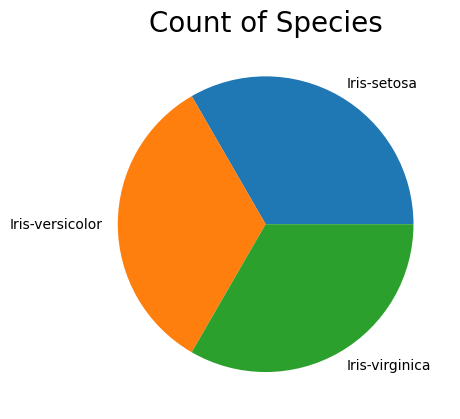

In [10]:
plt.pie(count,labels=lab)
plt.title("Count of Species",fontsize=20)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data.drop(["Species","Id"],axis=1)
X

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [13]:
Y = data["Species"]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [15]:
model = LogisticRegression(max_iter=1000)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [17]:
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print("Confusion Matrix\n",confusion_matrix(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion Matrix
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [18]:
print(accuracy_score(y_test,predictions))

0.9777777777777777


In [19]:
new_data = pd.DataFrame({
    'SepalLengthCm': [ 5.1, 6.9],
    'PetalLengthCm': [1.4, 4.9]
})
scaler = StandardScaler()
scaled_new_data = scaler.fit_transform(new_data)
predicted_species = model.predict(scaled_new_data)
print(predicted_species)

['Iris-setosa' 'Iris-setosa']


C:\Users\chait\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
